In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(sum([ord(c) for c in "vliunda"]))

In [181]:
class K_Means():
    """class for K_Means classification"""
    def __init__(self, eps=1e-3, k=2):
        self.eps = eps
        self.k = k
        self.centroids = None
        
    def fit(self,data, maxiter = 1000):
        """method for fitting data; -> (labels)"""
        #initializing centroids
        if self.centroids is None:
            self.centroids = np.r_[random.sample(list(data), self.k)]
        ctr_prev = self.centroids.copy()

        for i in range(maxiter):
            #labeling data
            labels = np.array(
                [np.argmin([np.linalg.norm(x-c) for c in self.centroids]) for x in data]
           ) 
            #updating centroids
            for i in range(self.k):
                self.centroids[i] = data[labels == i].mean(axis=0)
            if np.abs(ctr_prev-self.centroids).max() < self.eps:
                return labels
            ctr_prev = self.centroids.copy()
        return labels

In [69]:
X = np.array([[5.9, 3.2],
             [4.6, 2.9],
             [6.2, 2.8],
             [4.7, 3.2],
             [5.5, 4.2],
             [5.0, 3.0],
             [4.9, 3.1],
             [6.7, 3.1],
             [5.1, 3.8],
             [6.0, 3.0]])

In [68]:
mu = np.array([[6.2, 3.2], [6.6, 3.7], [6.5, 3.0]])

In [60]:
km = K_Means(k=3)
km.centroids = mu

labels = km.fit(X)

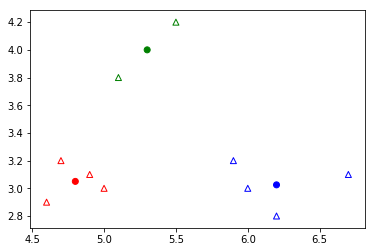

In [81]:
plt.scatter(X[:,0],X[:,1],edgecolor=[('r','g','b')[i] for i in labels], marker='^',facecolor='w')
plt.scatter(km.centroids[:,0],km.centroids[:,1], c=['r','g','b'])

In [70]:
baboon = cv2.imread('./data/baboon.jpg')[:,:,::-1]

In [86]:
X,Y = np.meshgrid(range(512),range(512))

In [90]:
points = np.concatenate(
    [X[:,:,np.newaxis],
     Y[:,:,np.newaxis],
     baboon], axis=2)

In [91]:
from sklearn.cluster import KMeans

In [158]:
km = KMeans(n_clusters=8, n_init=3, n_jobs=3)

In [159]:
p5 = points.reshape(-1, 5)

In [165]:
p5 = p5 / p5.max(axis=0)

In [204]:
km2 = K_Means(k = 3)

In [205]:
labels = km2.fit(p5)

In [188]:
labels = km.fit_predict(p5)

In [206]:
colors = (km2.centroids[:,2:] * 255).astype('uint8')

In [207]:
imres = np.array([colors[l] for l in labels]).reshape(512, 512,3)

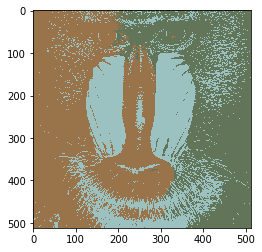

In [208]:
plt.imshow(imres)